In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
sales = pd.read_csv("./input/mock-count.csv")
df = sales.dropna()
print(sales)

X = df.index.factorize()[0].reshape(-1,1)
print("X: ", X)

y = sales["Count"].tolist()
print("y: ", y)



       Date  Count
0   2017-01    120
1   2017-02    110
2   2017-03     90
3   2017-04     95
4   2017-05     40
5   2017-06     63
6   2017-07     52
7   2017-08     40
8   2017-09     71
9   2017-10     22
10  2017-11     26
11  2017-12     29
12  2018-01    112
13  2018-02    118
14  2018-03    100
15  2018-04     89
16  2018-05     21
17  2018-06     35
18  2018-07     48
19  2018-08     48
20  2018-09     66
21  2018-10     39
22  2018-11     31
23  2018-12     28
X:  [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]]
y:  [120, 110, 90, 95, 40, 63, 52, 40, 71, 22, 26, 29, 112, 118, 100, 89, 21, 35, 48, 48, 66, 39, 31, 28]


In [2]:
train_size = int(len(y) * 0.67)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

regressor = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

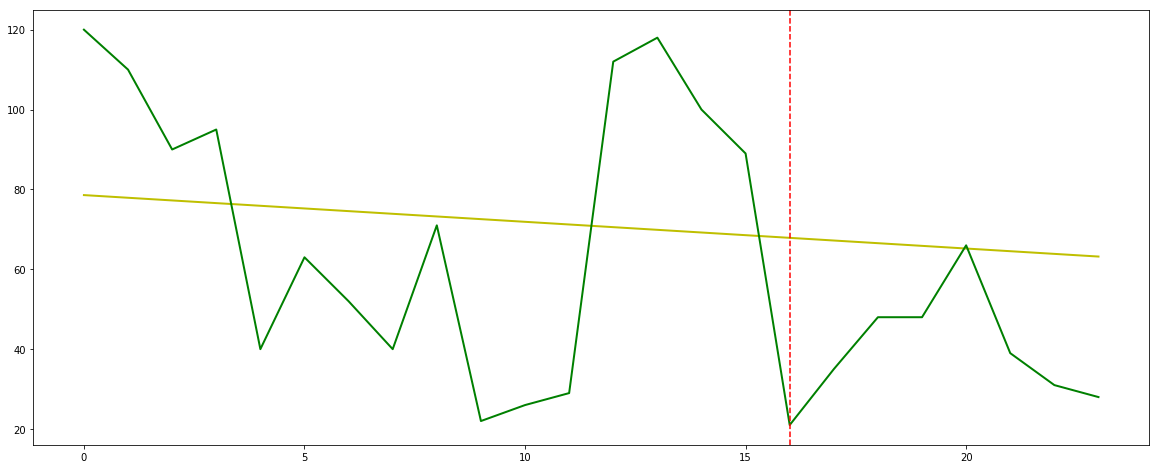

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(regressor.predict(X), "y", label="prediction", linewidth=2.0)
plt.plot(y, "g", label="real_values", linewidth=2.0)
plt.axvline(x=train_size, c='r', linestyle='--')
plt.legend(loc="best")
plt.show()

In [6]:
from sklearn.model_selection import TimeSeriesSplit
ts_cross_val = TimeSeriesSplit(n_splits=5)
from sklearn.model_selection import cross_val_score
cv = cross_val_score(regressor, X_train, y_train, cv = ts_cross_val, scoring= "neg_mean_squared_error")
print(cv)

[  -246.44444444  -1184.66354875   -184.46372819 -12083.53585478
  -1911.87137061]


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y, regressor.predict(X))
print("RMSE:", np.sqrt(mse))

RMSE: 32.3146465932011
